In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import konlpy
from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import re

Using TensorFlow backend.


In [2]:
df = pd.read_excel("C:/Users/min-sung.lee/SK/test_all3.xlsx")

In [3]:
df.head()

,content,countryEnName,countryName,fileUrl,id,title,wrtDt,Div
0,"&nbsp;&nbsp;미국, 입국 전 14일 이상 브라질 체류한 모든 외국인 입국 ...",United States of America,미국,NaN,ATC0000000007885,미국 입국 전 14일 이상 브라질 체류한 모든 외국인 입국 규제 관련 안내,2020-05-27,정보
1,홍콩 시위 관련 안전공지1. 현재 홍콩에서 보안법 이슈 쟁점화로 시위 빈도 및 강도...,hongkong,홍콩(중국),NaN,ATC0000000007884,홍콩 시위 관련 안전공지(5.26),2020-05-26,치안
2,ㅇ 열대성 폭풍 Manga가 5.24.(일)~5.25.(월) 호두 대륙을 통과할 예...,Australia,호주,NaN,ATC0000000007881,호주 열대성 폭풍 Manga 관련 안전 공지,2020-05-23,자연재해
3,태국 뎅기열 유행에 따른 유의사항 안내&nbsp;○ 최근 태국 동북부 지역에서 뎅기...,Thailand,태국,NaN,ATC0000000007857,태국 뎅기열 유행에 따른 유의사항,2020-05-19,질병
4,‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내&nbsp;○ 헝가리 정부는 4.3...,Hungary,헝가리,http://www.0404.go.kr/dev/fileDownload.mofa?at...,ATC0000000007855,‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내,2020-05-19,정보


In [4]:
len(df)

5574

In [5]:
df['countryName'].value_counts()

중국           201
일본           197
미국           191
파키스탄         175
이집트          166
나이지리아        157
인도           153
필리핀          140
태국           137
러시아          133
터키           124
인도네시아        108
독일            94
프랑스           89
사우디아라비아       86
스페인           82
아프가니스탄        81
네팔            78
케냐            74
알제리           72
브라질           71
페루            63
예멘            62
이라크           62
남아프리카공화국      60
베트남           60
이탈리아          58
이스라엘          54
방글라데시         53
호주            52
            ... 
사이프러스          4
마셜제도           4
토고             4
코모로            4
소말리아           3
아이슬란드          3
카보베르데          3
북마케도니아         3
기니비사우          3
중앙아프리카공화국      3
슬로베니아          2
마카오(중국)        2
코소보            2
나미비아           2
바누아투           2
에스와티니          2
적도기니           2
아르메니아          1
룩셈부르크          1
말라위            1
팔라우            1
키리바시           1
알바니아           1
부탄             1
레소토            1
베냉             1
사모아            1
지부티           

In [9]:
country_list = df['countryName'].values.tolist()

In [10]:
from konlpy.tag import Okt

stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']

stopwords += country_list

title_noun_list = []
okt = Okt()

for i in range(len(df)):
    _x = df.iloc[i]['title']
    
    okt_morphs = okt.pos(_x)  # 튜플반환
    temp_x = []
    for word, pos in okt_morphs:
        if pos == 'Noun':
            temp_x.append(word)
            
    temp_x = [word for word in temp_x if not word in stopwords]
    title_noun_list += temp_x
    

In [11]:
title_noun_list

['입국',
 '이상',
 '체류',
 '모든',
 '외국인',
 '입국',
 '규제',
 '관련',
 '안내',
 '홍콩',
 '시위',
 '관련',
 '안전',
 '공지',
 '대성',
 '폭풍',
 '관련',
 '안전',
 '공지',
 '뎅기열',
 '유행',
 '유의사항',
 '우리',
 '기업인',
 '대상',
 '입국',
 '허용',
 '관련',
 '안내',
 '우리',
 '기업인',
 '대상',
 '입국',
 '허용',
 '관련',
 '안내',
 '우리',
 '기업인',
 '대상',
 '입국',
 '허용',
 '관련',
 '안내',
 '우리',
 '기업인',
 '대상',
 '입국',
 '허용',
 '관련',
 '안내',
 '예외',
 '입국',
 '허가',
 '입국',
 '규제',
 '면제',
 '요청',
 '관련',
 '안내',
 '예외',
 '입국',
 '허가',
 '입국',
 '규제',
 '면제',
 '요청',
 '관련',
 '안내',
 '예외',
 '입국',
 '허가',
 '입국',
 '규제',
 '면제',
 '요청',
 '관련',
 '안내',
 '사이클론',
 '암판',
 '상륙',
 '관련',
 '안전',
 '유의',
 '지역',
 '야생',
 '진드기',
 '관련',
 '안내',
 '사항',
 '군',
 '경간',
 '충돌',
 '사태',
 '발생',
 '관련',
 '안전',
 '유의',
 '테러',
 '관련',
 '안전',
 '공지',
 '해외',
 '송금',
 '사기피해',
 '안전',
 '유의',
 '강력범죄',
 '발생',
 '관련',
 '안전',
 '공지',
 '정세',
 '불안',
 '지속',
 '안전',
 '유의',
 '시하누크빌',
 '관광객',
 '대상',
 '감금',
 '범죄',
 '주의',
 '치안',
 '상황',
 '악화',
 '안전',
 '공지',
 '코로나',
 '관련',
 '안전',
 '공지',
 '베이징',
 '진입',
 '인원',
 '대상',
 '호텔',
 '투숙',
 '관련',
 '베이징시',
 '발표'

In [12]:
from collections import Counter
c = Counter(title_noun_list)
print(c.most_common())
print(c.most_common(10))

[('안전', 2136), ('관련', 1687), ('유의', 1340), ('공지', 1072), ('주의', 948), ('발생', 903), ('안내', 786), ('신변', 786), ('테러', 708), ('지역', 554), ('시', 379), ('시위', 361), ('여행', 303), ('내', 294), ('당부', 267), ('사건', 261), ('사항', 231), ('피해', 225), ('치안', 212), ('우리', 209), ('유의사항', 205), ('국민', 189), ('폭탄', 168), ('강도', 166), ('지진', 158), ('범죄', 138), ('감염', 131), ('경보', 129), ('동향', 127), ('사기', 124), ('확산', 123), ('사태', 119), ('입국', 115), ('대상', 114), ('방문', 114), ('예방', 114), ('사고', 114), ('주', 112), ('외국인', 108), ('뎅기열', 101), ('위협', 101), ('바이러스', 95), ('자제', 94), ('기간', 93), ('강화', 91), ('소매치기', 91), ('악화', 90), ('이용', 88), ('여행객', 86), ('대규모', 86), ('차량', 86), ('행시', 84), ('남부', 81), ('정세', 79), ('정보', 78), ('체류', 75), ('발령', 75), ('납치', 73), ('상황', 72), ('태풍', 72), ('북부', 71), ('증가', 69), ('중', 68), ('불안', 67), ('환자', 67), ('대비', 67), ('화산', 64), ('공항', 63), ('시내', 61), ('요망', 60), ('비상', 58), ('공격', 58), ('반정부', 58), ('카', 58), ('절도', 57), ('국경', 56), ('총격', 56), ('활동', 56), ('가능성', 56),

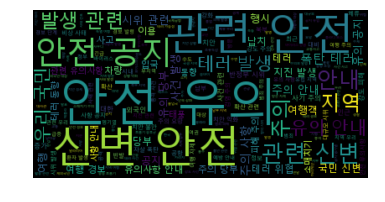

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ''
for word in title_noun_list:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


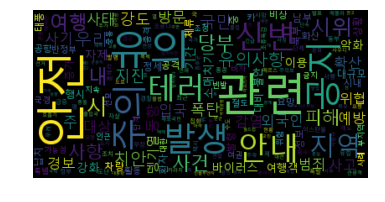

In [24]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate_from_frequencies(frequencies=c)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [29]:
cdf = pd.DataFrame()
cdf['value'] = c.most_common()

In [30]:
cdf

,value
0,"(안전, 2136)"
1,"(관련, 1687)"
2,"(유의, 1340)"
3,"(공지, 1072)"
4,"(주의, 948)"
5,"(발생, 903)"
6,"(안내, 786)"
7,"(신변, 786)"
8,"(테러, 708)"
9,"(지역, 554)"


In [31]:
cdf.to_excel('외교부 명사 리스트.xlsx', index=False)

In [35]:
from konlpy.tag import Okt

stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']

stopwords += country_list

content_noun_list = []
okt = Okt()

for i in range(len(df)):
    _x = df.iloc[i]['content']
    if pd.notnull(_x):
        okt_morphs = okt.pos(_x)  # 튜플반환
        temp_x = []
        for word, pos in okt_morphs:
            if pos == 'Noun':
                temp_x.append(word)

        temp_x = [word for word in temp_x if not word in stopwords]
        content_noun_list += temp_x

In [36]:
from collections import Counter
c2 = Counter(content_noun_list)
print(c2.most_common())
print(c2.most_common(10))

[('발생', 9295), ('지역', 7845), ('안전', 5956), ('시', 5735), ('우리', 4798), ('관련', 4549), ('것', 4229), ('여행', 4125), ('유의', 4115), ('경우', 4107), ('국민', 3946), ('명', 3680), ('방문', 3623), ('시기', 3612), ('상황', 3501), ('사건', 3449), ('테러', 3330), ('대사관', 3260), ('이', 3151), ('주의', 3105), ('신변', 2626), ('긴급', 2621), ('피해', 2456), ('최근', 2413), ('시위', 2385), ('체류', 2306), ('자제', 2255), ('중', 2239), ('연락', 2209), ('내', 1991), ('사고', 1940), ('주', 1905), ('아래', 1903), ('경찰', 1834), ('차량', 1818), ('현지', 1795), ('이용', 1762), ('연락처', 1710), ('당부', 1605), ('후', 1599), ('확인', 1578), ('감염', 1560), ('사망', 1505), ('공지', 1469), ('정부', 1464), ('입국', 1440), ('사항', 1376), ('사례', 1349), ('대한', 1314), ('범죄', 1297), ('안내', 1282), ('함', 1257), ('여행객', 1232), ('치안', 1212), ('외국인', 1190), ('현재', 1185), ('경보', 1165), ('예방', 1162), ('거주', 1156), ('강도', 1149), ('바', 1138), ('장소', 1113), ('국', 1112), ('참고', 1096), ('대한민국', 1084), ('인근', 1033), ('영사관', 1031), ('예정', 1026), ('근무시간', 1013), ('정보', 1011), ('여권', 1011), ('가능성',

In [37]:
cdf2 = pd.DataFrame()
cdf2['value'] = c2.most_common()
cdf2.to_excel('외교부_본문_명사_리스트.xlsx', index=False)

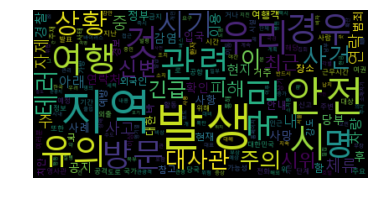

In [38]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate_from_frequencies(frequencies=c2)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from konlpy.tag import Okt

stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']

stopwords += country_list

title_noun_list = []
okt = Okt()

for i in range(len(df)):
    _x = df.iloc[i]['title']
    
    okt_morphs = okt.pos(_x)  # 튜플반환
    temp_x = []
    for word, pos in okt_morphs:
        if pos == 'Noun':
            temp_x.append(word)
            
    temp_x = [word for word in temp_x if not word in stopwords]
    title_noun_list.append(temp_x)

In [6]:
df = df.dropna(how='any', subset=['Div'])
print(len(df))

236


In [7]:
df.columns

Index(['content', 'countryEnName', 'countryName', 'fileUrl', 'id', 'title',
       'wrtDt', 'Div', 'Flag'],
      dtype='object')

In [8]:
df['Content'] = df.apply(lambda x: np.nan if pd.isnull(x['title']) and pd.isnull(x['content']) else x['title'] if pd.isnull(x['content']) else x['title'] + ' ' + x['content'] , axis=1)

In [9]:
df = df[['Content', 'Div']]

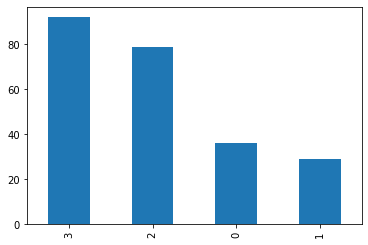

In [47]:
df['Div'].value_counts().plot(kind='bar')

In [10]:
dic = {
    '정보': 0,
    '자연재해': 1,
    '질병': 2,
    '치안': 3
}
df['Div'] = df['Div'].apply(lambda x: dic[x])

In [11]:
df.head()

,Content,Div
0,미국 입국 전 14일 이상 브라질 체류한 모든 외국인 입국 규제 관련 안내 &nbs...,0
1,홍콩 시위 관련 안전공지(5.26) 홍콩 시위 관련 안전공지1. 현재 홍콩에서 보안...,3
2,호주 열대성 폭풍 Manga 관련 안전 공지 ㅇ 열대성 폭풍 Manga가 5.24....,1
3,태국 뎅기열 유행에 따른 유의사항 태국 뎅기열 유행에 따른 유의사항 안내&nbsp;...,2
4,‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내 ‘우리 기업인 대상’ 헝가리 입국...,0


In [21]:
from konlpy.tag import Okt

stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']

X = []
okt = Okt()

for i in range(len(df)):
    _x = df.iloc[i]['Content']
    
    okt_morphs = okt.pos(_x)  # 튜플반환
    temp_x = []
    for word, pos in okt_morphs:
        if pos == 'Noun' or pos == 'Verb':
            temp_x.append(word)
            
    temp_x = [word for word in temp_x if not word in stopwords]
    X.append(temp_x)
    

max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

제목의 최대 길이 :  740
제목의 평균 길이 :  153.3135593220339


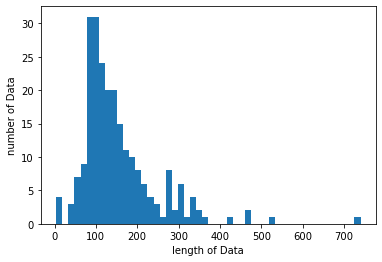

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

print("제목의 최대 길이 : ", max(len(l) for l in X))
print("제목의 평균 길이 : ", sum(map(len, X))/ len(X))
plt.hist([len(s) for s in X], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [35]:
Y = []

for i in range(len(df['Div'])):
    if df['Div'].iloc[i] == 0:
        Y.append([1, 0, 0, 0])
    elif df['Div'].iloc[i] == 1:
        Y.append([0, 1, 0, 0])
    elif df['Div'].iloc[i] == 2:
        Y.append([0, 0, 1, 0])
    elif df['Div'].iloc[i] == 3:
        Y.append([0, 0, 0, 1])

Y = np.array(Y)

In [36]:
Y

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0,

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [42]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

max_len = 740 # 전체 데이터의 길이를 20로 맞춘다
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [43]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(4, activation='softmax'))
# optimizer rmsprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train on 190 samples, validate on 22 samples
Epoch 1/10
190/190 [==============================] - 11s 56ms/step - loss: 1.3673 - accuracy: 0.3316 - val_loss: 1.2455 - val_accuracy: 0.5000
Epoch 2/10
190/190 [==============================] - 10s 54ms/step - loss: 1.2920 - accuracy: 0.4579 - val_loss: 1.2323 - val_accuracy: 0.4545
Epoch 3/10
190/190 [==============================] - 12s 61ms/step - loss: 1.1278 - accuracy: 0.5579 - val_loss: 1.0104 - val_accuracy: 0.5000
Epoch 4/10
190/190 [==============================] - 11s 58ms/step - loss: 0.8709 - accuracy: 0.5684 - val_loss: 0.9460 - val_accuracy: 0.3182
Epoch 5/10
190/190 [==============================] - 11s 56ms/step - loss: 0.6883 - accuracy: 0.6211 - val_loss: 0.9990 - val_accuracy: 0.4545
Epoch 6/10
190/190 [==============================] - 10s 54ms/step - loss: 0.5974 - accuracy: 0.7368 - val_loss: 0.9684 - val_accuracy: 0.5000
Epoch 7/10
190/190 [==============================] - 11s 56ms/step - loss: 0.4994 - accura

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         3500000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 3,617,764
Trainable params: 3,617,764
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

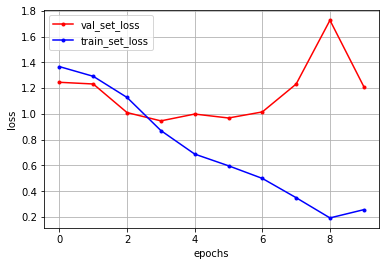

In [54]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [48]:
print("Accuracy: {:.4f}%".format(model.evaluate(x_test,y_test)[1]*100))

24/24 [==============================] - 0s 5ms/step
Accuracy: 75.0000%


In [44]:
predict = model.predict(x_test)

predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [46]:

for i in range(20): 
    print("기사제목 : ", x_test['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

기사제목 :  미국 입국 전 14일 이상 브라질 체류한 모든 외국인 입국 규제 관련 안내 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  홍콩 시위 관련 안전공지(5.26) /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  호주 열대성 폭풍 Manga 관련 안전 공지 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  태국 뎅기열 유행에 따른 유의사항 /	 원래 라벨 :  0 /	예측한 라벨 :  0
기사제목 :  ‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내 /	 원래 라벨 :  1 /	예측한 라벨 :  2
기사제목 :  ‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  ‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  ‘우리 기업인 대상’ 헝가리 입국 허용 관련 안내 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  헝가리 예외적 입국허가(입국 규제 면제 요청) 관련 안내 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  헝가리 예외적 입국허가(입국 규제 면제 요청) 관련 안내 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  헝가리 예외적 입국허가(입국 규제 면제 요청) 관련 안내 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  사이클론 암판 상륙(인도, 방글라데시) 관련 안전유의 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  러시아 극동지역 야생진드기 관련 안내 사항 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  파푸아뉴기니 군·경간 충돌사태 발생 관련 안전 유의 /	 원래 라벨 :  3 /	예측한 라벨 :  3
기사제목 :  덴마크 테러 관련 안전 공지 /	 원래 라벨 :  2 /	예측한 라벨 :  3
기사제목 :  포르투갈 해외송금 사기피해 안전유의 /	 원래 라벨 :  3 /	예측한

In [12]:
train, test = train_test_split(df, test_size=0.2)

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ModuleNotFoundError: No module named 'sklearn'

In [20]:
Okt = Okt()
Okt_morphs = Okt.pos(t)  # 튜플반환
print(Okt_morphs)

[('&', 'Punctuation'), ('nbsp', 'Alpha'), (';&', 'Punctuation'), ('nbsp', 'Alpha'), (';', 'Punctuation'), ('미국', 'Noun'), (',', 'Punctuation'), ('입국', 'Noun'), ('전', 'Noun'), ('14일', 'Number'), ('이상', 'Noun'), ('브라질', 'Noun'), ('체류', 'Noun'), ('한', 'Josa'), ('모든', 'Noun'), ('외국인', 'Noun'), ('입국', 'Noun'), ('규제', 'Noun'), ('관련', 'Noun'), ('안내', 'Noun'), ('&', 'Punctuation'), ('nbsp', 'Alpha'), (';&', 'Punctuation'), ('nbsp', 'Alpha'), (';&', 'Punctuation'), ('nbsp', 'Alpha'), (';', 'Punctuation'), ('○', 'Foreign'), ('미국', 'Noun'), ('정부', 'Noun'), ('는', 'Josa'), ('2020년', 'Number'), ('5월', 'Number'), ('24일', 'Number'), ('대통령', 'Noun'), ('선포', 'Noun'), ('에', 'Josa'), ('이어', 'Verb'), ('25일', 'Number'), ('수', 'Modifier'), ('정안', 'Noun'), ('을', 'Josa'), ('발표', 'Noun'), (',', 'Punctuation'), ('미국', 'Noun'), ('입국', 'Noun'), ('전', 'Noun'), ('브라질', 'Noun'), ('에서', 'Josa'), ('14일', 'Number'), ('이상', 'Noun'), ('체류', 'Noun'), ('한', 'Josa'), ('모든', 'Noun'), ('외국인', 'Noun'), ('에', 'Josa'), ('대한', 'No

In [34]:
Noun_words = []
for word, pos in Okt_morphs:
#     if pos == 'Noun' or pos == 'Verb':
    if pos == 'Noun':
        Noun_words.append(word)
print(Noun_words)

['미국', '입국', '전', '이상', '브라질', '체류', '모든', '외국인', '입국', '규제', '관련', '안내', '미국', '정부', '대통령', '선포', '정안', '발표', '미국', '입국', '전', '브라질', '이상', '체류', '모든', '외국인', '대한', '입국', '규제', '조치', '동부', '일광', '절약', '시간', '부터', '적용', '발표', '미국인', '및', '그', '배우자', '승무원', '및', '미국', '정부', '초청', '사람', '등', '제외', '브라질', '수', '기준', '코로나', '확', '진자', '수', '명', '세계', '위', '위', '미국', '다만', '화', '이전', '출발', '미국', '도착', '항공', '편', '해당', '조치', '적용', '이', '관련', '브라질', '경유', '미국', '방문', '계획', '분', '관련', '사항', '숙지', '상황', '발생', '유의', '기타', '각종', '도움', '분', '아래', '연락처', '참고', '도움', '콜센터', '미국', '대한민국', '대사관', '대표', '일반', '번호', '긴급', '번호']


In [35]:
stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in Noun_words: Noun_words.remove(word)

In [36]:
print(Noun_words)

['미국', '입국', '이상', '브라질', '체류', '모든', '외국인', '입국', '규제', '관련', '안내', '미국', '정부', '대통령', '선포', '정안', '발표', '미국', '입국', '브라질', '이상', '체류', '모든', '외국인', '대한', '입국', '규제', '조치', '동부', '일광', '절약', '시간', '부터', '적용', '발표', '미국인', '그', '배우자', '승무원', '미국', '정부', '초청', '사람', '제외', '브라질', '기준', '코로나', '확', '진자', '명', '세계', '위', '위', '미국', '다만', '이전', '출발', '미국', '도착', '항공', '편', '해당', '조치', '적용', '이', '관련', '브라질', '경유', '미국', '방문', '계획', '분', '관련', '사항', '숙지', '상황', '발생', '유의', '기타', '각종', '도움', '분', '아래', '연락처', '참고', '도움', '미국', '대한민국', '대사관', '대표', '일반', '긴급']


In [37]:
from collections import Counter
c = Counter(Noun_words)
print(c.most_common(10))

[('미국', 8), ('입국', 4), ('브라질', 4), ('관련', 3), ('이상', 2), ('체류', 2), ('모든', 2), ('외국인', 2), ('규제', 2), ('정부', 2)]


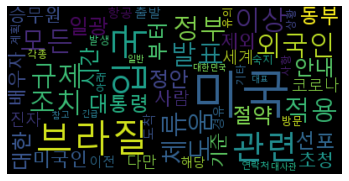

In [38]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ''
for word in Noun_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [31]:
X_train = [Noun_words]

In [32]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [33]:
X_train

[[1,
  2,
  6,
  7,
  3,
  8,
  9,
  10,
  2,
  11,
  4,
  20,
  1,
  12,
  21,
  22,
  23,
  24,
  13,
  1,
  2,
  6,
  3,
  7,
  8,
  9,
  10,
  25,
  2,
  11,
  14,
  26,
  27,
  28,
  29,
  30,
  15,
  31,
  13,
  32,
  33,
  34,
  35,
  36,
  1,
  12,
  37,
  38,
  39,
  40,
  41,
  3,
  16,
  42,
  43,
  44,
  45,
  16,
  46,
  47,
  17,
  17,
  1,
  48,
  49,
  50,
  51,
  1,
  52,
  53,
  54,
  55,
  14,
  15,
  56,
  57,
  58,
  4,
  3,
  59,
  5,
  1,
  60,
  61,
  62,
  18,
  4,
  63,
  64,
  5,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  19,
  18,
  74,
  75,
  76,
  5,
  19,
  77,
  78,
  1,
  79,
  80,
  81,
  82,
  83]]

In [ ]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()



In [ ]:
import numpy as np
y_train = []
y_test = []
for i in range(len(train_data['label'])):
    if train_data['label'].iloc[i] == 1:
        y_train.append([0, 0, 1])
    elif train_data['label'].iloc[i] == 0:
        y_train.append([0, 1, 0]) 
    elif train_data['label'].iloc[i] == -1:
        y_train.append([1, 0, 0])
        
for i in range(len(test_data['label'])):
    if test_data['label'].iloc[i] == 1:
        y_test.append([0, 0, 1])
    elif test_data['label'].iloc[i] == 0:
        y_test.append([0, 1, 0])
    elif test_data['label'].iloc[i] == -1:
        y_test.append([1, 0, 0])

        
y_train = np.array(y_train)
y_test = np.array(y_test)



In [ ]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
# optimizer rmsprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)


In [ ]:
print("Accuracy: {:.2f}%".format(model.evaluate(X.test,y_test)[1]*100))

In [ ]:
predict = model.predict(X_test)

predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)



In [ ]:
for i in range(30): 
    print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])


In [15]:
import lxml.html
import lxml.html.clean

doc = lxml.html.fromstring(t)
cleaner = lxml.html.clean.Cleaner(style=True)
doc = cleaner.clean_html(doc)
text = doc.text_content()
text

'\xa0\xa0미국, 입국 전 14일 이상 브라질 체류한 모든 외국인 입국 규제 관련 안내\xa0\xa0\xa0○ 미국 정부는 2020년 5월 24일 대통령 선포에 이어 25일 수정안을 발표, 미국 입국 전 브라질에서 14일 이상 체류한 모든 외국인에 대한 입국 규제 조치를 2020년 5월 26일 동부 일광 절약 시간으로 23:59부터 적용된다고 발표하였습니다.\xa0 - 미국인 및 그 배우자, 승무원 및 미국 정부의 초청을 받은 사람 등은 제외됨\xa0 - 브라질은 5.27.(수) 00:00기준 코로나19 확진자 수 374,898명으로 세계 2위(1위 미국)\xa0○ 다만, 5.26.(화) 23:59 이전에 출발한 미국 도착 항공편에는 해당 조치가 적용되지 않습니다.\xa0○ 이와 관련, 특히 브라질을 경유하여 미국을 방문할 계획이신 분들은 관련사항 숙지하여 곤란한 상황이 발생하지 않도록 유의하시기 바라며, 기타 각종 도움이 필요하신 분들은 아래 연락처를 참고하여 적절한 도움을 받으시기 바랍니다.\xa0 \xa0 \xa0☞ 영사콜센터 : +82-2-3210-0404\xa0\xa0 \xa0 \xa0☞ 주미국대한민국대사관\xa0 \xa0 \xa0 \xa0 - 대표(일반)번호 +1-202-939-5600\xa0 \xa0 \xa0 \xa0 - 긴급번호\xa0 +1-202-939-5653'

In [ ]:
import re
re.compile('[가-힇+]')

In [16]:
okt = Okt()
train_x = []
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

# for sentence in train_data['title']:
#     temp_x = []
temp_x = okt.morphs(t, stem=True) # 토큰화
temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
train_x.append(temp_x)


In [17]:
train_x

[['&',
  'nbsp',
  ';&',
  'nbsp',
  ';',
  '미국',
  ',',
  '입국',
  '전',
  '14일',
  '이상',
  '브라질',
  '체류',
  '모든',
  '외국인',
  '입국',
  '규제',
  '관련',
  '안내',
  '&',
  'nbsp',
  ';&',
  'nbsp',
  ';&',
  'nbsp',
  ';',
  '○',
  '미국',
  '정부',
  '2020년',
  '5월',
  '24일',
  '대통령',
  '선포',
  '이다',
  '25일',
  '수',
  '정안',
  '을',
  '발표',
  ',',
  '미국',
  '입국',
  '전',
  '브라질',
  '에서',
  '14일',
  '이상',
  '체류',
  '모든',
  '외국인',
  '대한',
  '입국',
  '규제',
  '조치',
  '2020년',
  '5월',
  '26일',
  '동부',
  '일광',
  '절약',
  '시간',
  '23:59',
  '부터',
  '적용',
  '되다',
  '발표',
  '.&',
  'nbsp',
  ';',
  '-',
  '미국인',
  '및',
  '그',
  '배우자',
  ',',
  '승무원',
  '및',
  '미국',
  '정부',
  '초청',
  '을',
  '받다',
  '사람',
  '등',
  '제외',
  '되다',
  '&',
  'nbsp',
  ';',
  '-',
  '브라질',
  '5.27',
  '.(',
  '수',
  ')',
  '00:00',
  '기준',
  '코로나',
  '19',
  '확',
  '진자',
  '수',
  '374,898',
  '명',
  '세계',
  '2',
  '위',
  '(',
  '1',
  '위',
  '미국',
  ')&',
  'nbsp',
  ';',
  '○',
  '다만',
  ',',
  '5.26',
  '.(',
  '화',
  ')',
  '23:59'